# EDA

In [105]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import pybingmaps
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import timeit

bing = pybingmaps.Bing('AizoCiuRwxjT9SjxftwCItVoRXI2v0V3UnLTKSebigC5GUW5NklrIZpL5jRANFuJ')

In [106]:
#Inicializacion de variables de tu posicion
my_latitude =20.677041
my_longuitud =-103.347745
my_location = (my_latitude, my_longuitud)
np_my_location_arr = np.array([my_latitude,my_longuitud])
df_my_location = pd.DataFrame({'Latitud': [my_latitude],'Longuitud': [my_longuitud]})
#np_my_location_arr

In [107]:
#Importando los datos y convirtiendolo en un dataframe
df_Hospitals = pd.read_excel("./Master_Dataset_AI_Saturday.xlsx")
#print(df_Hospitals)

In [108]:
df_Hospitals.head()

,AÑO,CLUES,CLAVE INSTITUCION,CLAVE MUNICIPIO,LATITUD,LONGITUD,DISTANCIA,TIEMPO TRANSLADO,NOMBRE DE LA UNIDAD,TOTAL DE CONSULTORIOS,TOTAL CAMAS AREA HOSPITALIZACIÓN,TOTAL CAMAS EN OTRAS AREAS (NO CONSIDERA HOSPITALIZACIÓN),TOTAL MEDICOS GENERALES Y ESPECIALISTAS,TOTAL DE ENFERMERAS EN CONTACTO CON EL PACIENTE,TOTAL DE URGENCIAS(AFECCIONES),EGRESOS HOSPITALARIOS,TOTAL CONSULTA EXTERNA ADULTOS Y PEDIATRIA 1RA VEZ Y SUBSECUENTE,NUMEROS DE PACIENTES POR HOSPITAL
0,2018,JCIMS000296,IMS,39,20.686922,-103.328075,2.32,4.64,BCO. SANGRE OBLATOS,0,0,0,4,5,NaN,NaN,NaN,NaN
1,2018,JCIMS001112,IMS,120,20.729193,-103.390566,0.91,1.82,C.C.S. MENTAL 1,15,160,0,9,2,NaN,NaN,NaN,NaN
2,2018,JCSSA013646,SSA,97,20.475000,-103.447000,0.08,0.16,CARAVANA DE LA SALUD TLAJOMULCO,0,0,0,2,1,NaN,NaN,NaN,NaN
3,2018,JCSSA009211,SSA,39,20.713143,-103.353109,4.05,8.10,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,2,0,0,0,0,NaN,NaN,NaN,NaN
4,2018,JCSSA013465,SSA,97,20.518600,-103.376000,8.78,17.56,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES NUEV...,2,0,0,0,0,NaN,NaN,NaN,NaN


In [109]:
#Verificar cuantos datos hay nulos
#coordinates_df.isnull().sum()

In [110]:
#Informacion General del dataframe
#df_Hospitals.describe()

<Figure size 3600x0 with 0 Axes>

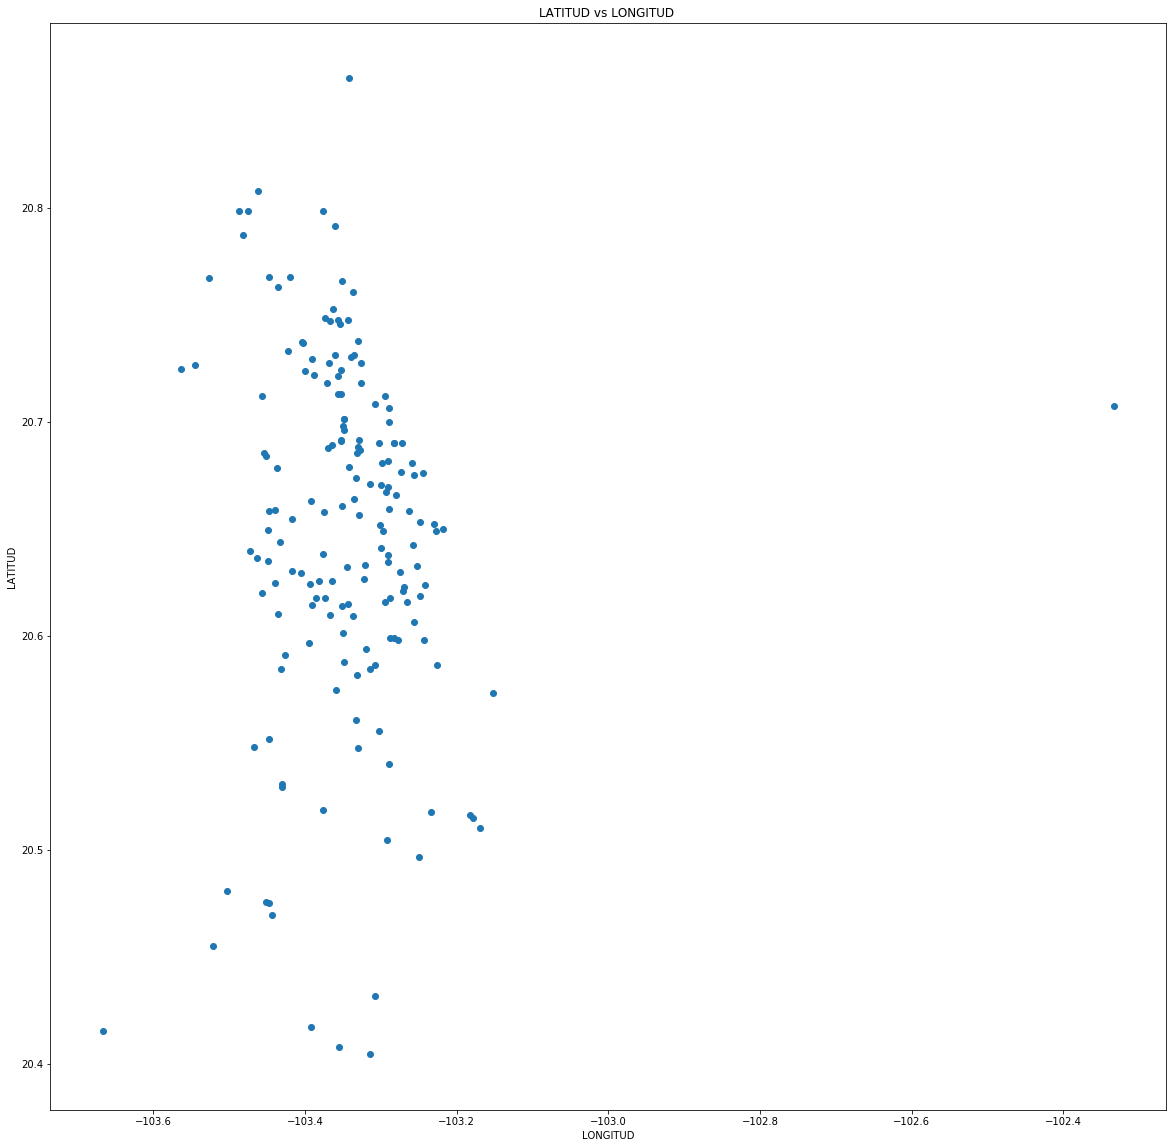

<Figure size 3600x0 with 0 Axes>

In [111]:
#Creando el plot
fig, ax = plt.subplots(figsize=(20, 20))
#Graficando Longitud es X axis axis en un mapa, Latitud es Y axis en un mapa y 
ax.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'])
#Configurando los titulos y etiquetas
ax.set_title('LATITUD vs LONGITUD ')
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')
plt.figure(figsize=(50,0))

# Clustering 

In [154]:
#Juntando los datos de las localizaciones del hospital que nutren al algoritmo de Kmeans
df_LatitudHospitals = pd.DataFrame(df_Hospitals['LATITUD'])
df_LongitudHospitals = pd.DataFrame(df_Hospitals['LONGITUD'])
df_coordenadasHospitals = df_LatitudHospitals.join(df_LongitudHospitals)
df_coordenadasHospitals

,LATITUD,LONGITUD
0,20.686922,-103.328075
1,20.729193,-103.390566
2,20.475000,-103.447000
3,20.713143,-103.353109
4,20.518600,-103.376000
...,...,...
167,20.415500,-103.666000
168,20.632400,-103.252000
169,20.683800,-103.451000
170,20.679007,-103.342022


## K - Nearest Neighbors

In [195]:
#https://scikit-learn.org/stable/modules/neighbors.html
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors
tic=timeit.default_timer()
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(df_coordenadasHospitals)
distances, indices = nbrs.kneighbors(df_my_location)
toc=timeit.default_timer()
print("Tiempo Nearest Neighbors:",toc-tic)

df_distances = pd.DataFrame(distances)
df_indices = pd.DataFrame(indices)
df_indices = df_indices.T
df_indices = df_indices.rename({0: "Indices"}, axis='columns')

Tiempo Nearest Neighbors: 0.005604582000160008


In [196]:
for i in df_indices.index:
    indice = df_indices.iat[i,0]
    df_indices.at[i, 'Latitud'] = df_coordenadasHospitals.iat[indice,0]
    df_indices.at[i, 'Longuitud'] = df_coordenadasHospitals.iat[indice,1]

df_indices = df_indices.drop(['Indices'], axis=1)
array_indices = df_indices.to_numpy()

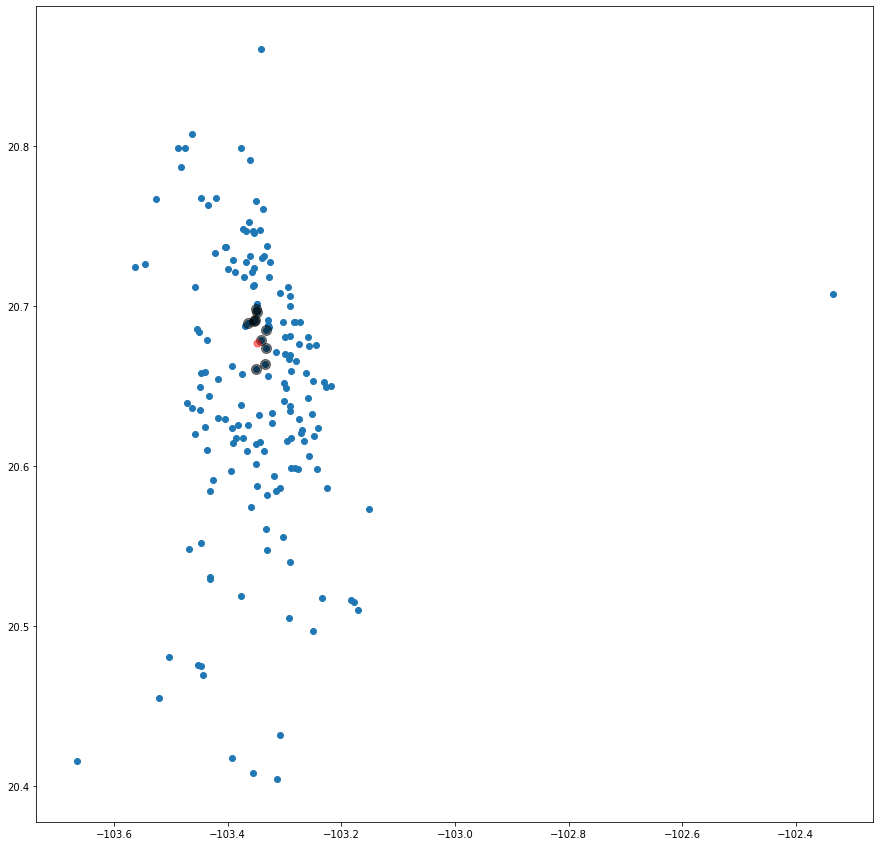

In [199]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], cmap='viridis')
plt.scatter(array_indices[:, 1], array_indices[:, 0], c='black', s=100, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=50, alpha=0.5);

## K-Means

In [116]:
# La documentacion de Kmeans se puede encontrar en: 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [158]:
#Se ejecutara 2 veces, la primera vez el algoritmo para conseguir los centros y la segunda vez para incluir la posicion
#en la que nos encontramos como un centro
tic=timeit.default_timer()
k_means1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
k_means1.fit(df_coordenadasHospitals)
y_kmeans1 = k_means1.predict(df_coordenadasHospitals)
toc=timeit.default_timer()
centers = k_means1.cluster_centers_
print(centers)
print("Tiempo Kmeans1:",toc-tic)

[[  20.63705605 -103.26698363]
 [  20.49306025 -103.48094075]
 [  20.74510941 -103.36695089]
 [  20.70747016 -102.3337922 ]
 [  20.68833614 -103.3210839 ]
 [  20.60184489 -103.3513302 ]
 [  20.64080687 -103.43756186]
 [  20.52886088 -103.21933198]
 [  20.41523379 -103.34197982]
 [  20.76540133 -103.48801712]]
Tiempo Kmeans1: 0.1997328359993844


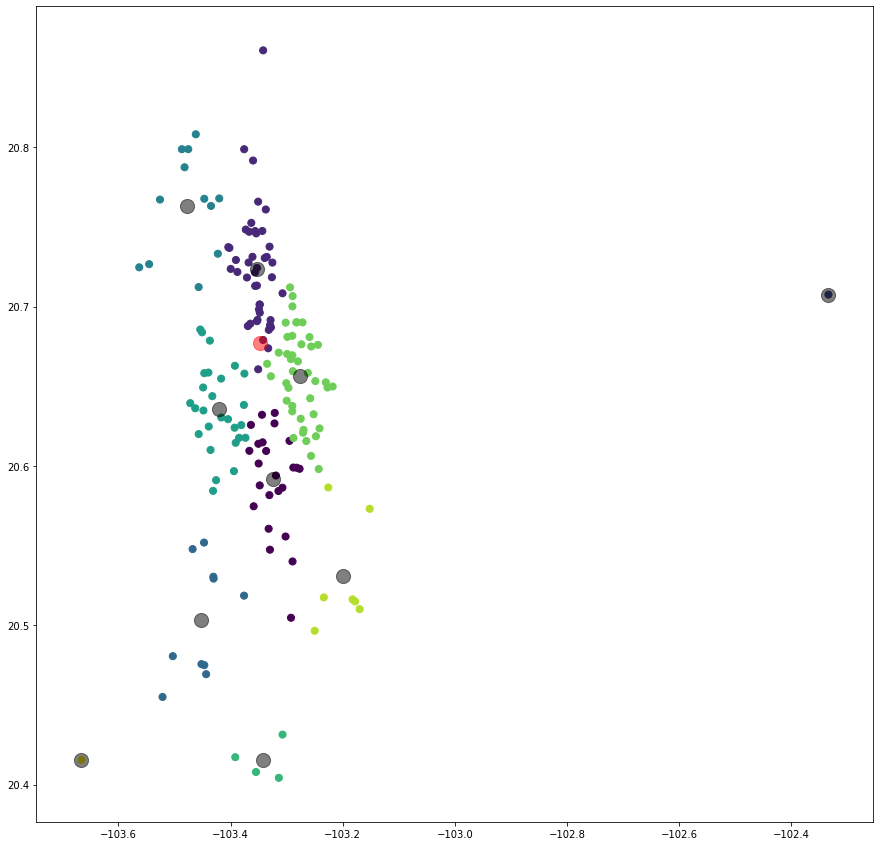

In [118]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans1, s=50, cmap='viridis')
centers1 = k_means1.cluster_centers_
plt.scatter(centers1[:, 1], centers1[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [119]:
newcenters = np.insert(centers, 0, np_my_location_arr, axis=0)
newcenters

array([[  20.677041  , -103.347745  ],
       [  20.59148171, -103.32354136],
       [  20.72359097, -103.3538209 ],
       [  20.70747016, -102.3337922 ],
       [  20.50337025, -103.45194075],
       [  20.76291174, -103.47693223],
       [  20.63583312, -103.42158366],
       [  20.41523379, -103.34197982],
       [  20.65657695, -103.27603509],
       [  20.53070948, -103.19887199],
       [  20.4155    , -103.666     ]])

In [120]:
print(my_location)

(20.677041, -103.347745)


In [121]:
#https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
#https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering
tic=timeit.default_timer()
k_means2 = KMeans(init=newcenters, n_clusters=11, n_init=1, max_iter=1)
k_means2.fit(df_coordenadasHospitals)
y_kmeans2 = k_means2.predict(df_coordenadasHospitals)
toc=timeit.default_timer()
print("Tiempo Kmeans2", toc - tic)

Tiempo Kmeans2 0.009371445999931893


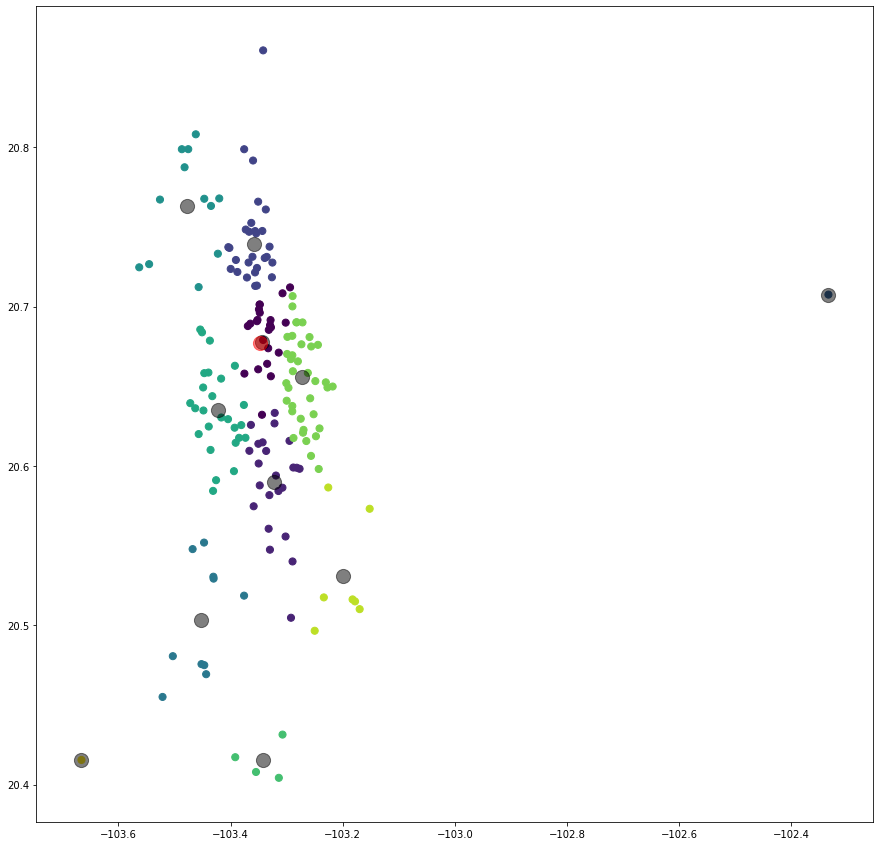

In [122]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans2, s=50, cmap='viridis')
centers2 = k_means2.cluster_centers_
plt.scatter(centers2[:, 1], centers2[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [123]:
df_Outputs_KMeans = pd.DataFrame(df_Hospitals['NOMBRE DE LA UNIDAD'])
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LATITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LONGITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(data=y_kmeans2, columns=["Center_Index"]))

In [124]:
closest_cluster_center = k_means2.predict(df_my_location)

In [125]:
LocateCenters = df_Outputs_KMeans.loc[df_Outputs_KMeans["Center_Index"] == closest_cluster_center[0]] 
LocateCenters = LocateCenters.reset_index()
LocateCenters = LocateCenters.drop(['index'], axis=1)
LocateCenters = LocateCenters.drop(['Center_Index'], axis=1)

In [126]:
tic=timeit.default_timer()
for i in LocateCenters.index:
    hospital_location = (LocateCenters.iat[i,1], LocateCenters.iat[i,2])
    LocateCenters.at[i, 'Tiempo_Estimado(seg)'] = bing.travelTime(my_location, hospital_location )
    LocateCenters.at[i, 'Distancia_Estimada(km)'] = bing.travelDistance(my_location, hospital_location)
toc=timeit.default_timer()
print("Tiempo API Bing:",toc-tic)

Tiempo API Bing: 10.927209725000466


In [127]:
print(my_location)

(20.677041, -103.347745)


# Evaluacion de Parametros

In [128]:
Hospitals_nearby_me = LocateCenters
Hospitals_nearby_me = LocateCenters.drop(['LATITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.drop(['LONGITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL DE CONSULTORIOS']))
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS
0,BCO. SANGRE OBLATOS,857.0,2.912,0,4
1,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,662.0,3.306,15,9
2,CENTRO DE SALUD GUADALAJARA 3,448.0,2.067,0,2
3,CENTRO DE SALUD LA AURORA Y LA ESPERANZA,1565.0,6.768,2,0
4,CENTRO DE SALUD LA NOGALERA,1109.0,6.626,2,0
5,CENTRO DE SALUD N°1,608.0,2.286,2,0
6,CENTRO DE SALUD SAN MIGUEL DE HUENTITAN,1643.0,8.841,2,0
7,CENTRO DE SALUD YUGOSLAVIA 4,993.0,4.805,2,0
8,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,478.0,2.185,2,0
9,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,597.0,2.750,2,0


In [129]:
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS
0,BCO. SANGRE OBLATOS,857.0,2.912,0,4
1,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,662.0,3.306,15,9
2,CENTRO DE SALUD GUADALAJARA 3,448.0,2.067,0,2
3,CENTRO DE SALUD LA AURORA Y LA ESPERANZA,1565.0,6.768,2,0
4,CENTRO DE SALUD LA NOGALERA,1109.0,6.626,2,0
5,CENTRO DE SALUD N°1,608.0,2.286,2,0
6,CENTRO DE SALUD SAN MIGUEL DE HUENTITAN,1643.0,8.841,2,0
7,CENTRO DE SALUD YUGOSLAVIA 4,993.0,4.805,2,0
8,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,478.0,2.185,2,0
9,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,597.0,2.750,2,0


In [130]:
#Preferencias Funcion de Evaluacion
#30% Tiempo de Traslado
#10% Distancia de Traslado
#10% Cantidad de Consultorios
#20% Cantidad de Medicos
#30% Ocupacion

Evaluacion_Hospitals_nearby_me = Hospitals_nearby_me

tic=timeit.default_timer()
'''
Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Tiempo_Estimado(seg)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Distancia'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Distancia_Estimada(km)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values
'''

Evaluacion_Hospitals_nearby_me['Ev_Consultorios'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL DE CONSULTORIOS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Medicos'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

'''
Evaluacion_Hospitals_nearby_me["Ev_Tiempo"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Tiempo"])+1
Evaluacion_Hospitals_nearby_me["Ev_Distancia"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Distancia"])+1
'''

Evaluacion_Hospitals_nearby_me["Calificacion"] =(
#                                                Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] * 0.3
#                                                +Evaluacion_Hospitals_nearby_me['Ev_Distancia']* 0.1
                                                Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

toc=timeit.default_timer()

Evaluacion_Hospitals_nearby_me["Ranking"] = Evaluacion_Hospitals_nearby_me['Calificacion'].rank(method='dense', ascending = False)

Evaluacion_Hospitals_nearby_me.head()

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,857.0,2.912,0,4,0.000,0.375,0.0750,9.0
1,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,662.0,3.306,15,9,0.875,0.875,0.2625,2.0
2,CENTRO DE SALUD GUADALAJARA 3,448.0,2.067,0,2,0.000,0.125,0.0250,11.0
3,CENTRO DE SALUD LA AURORA Y LA ESPERANZA,1565.0,6.768,2,0,0.250,0.000,0.0250,11.0
4,CENTRO DE SALUD LA NOGALERA,1109.0,6.626,2,0,0.250,0.000,0.0250,11.0


In [131]:
print("Tiempo PercentilRank: ",toc - tic)

Tiempo PercentilRank:  0.3159945930001413


# ML and Training 

In [132]:
Evaluacion_Hospitals_2Train = Evaluacion_Hospitals_nearby_me
#Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Tiempo'], axis=1)
#Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Distancia'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Calificacion'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ranking'], axis=1)

In [133]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos
0,BCO. SANGRE OBLATOS,857.0,2.912,0,4,0.000,0.375
1,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,662.0,3.306,15,9,0.875,0.875
2,CENTRO DE SALUD GUADALAJARA 3,448.0,2.067,0,2,0.000,0.125
3,CENTRO DE SALUD LA AURORA Y LA ESPERANZA,1565.0,6.768,2,0,0.250,0.000
4,CENTRO DE SALUD LA NOGALERA,1109.0,6.626,2,0,0.250,0.000
5,CENTRO DE SALUD N°1,608.0,2.286,2,0,0.250,0.000
6,CENTRO DE SALUD SAN MIGUEL DE HUENTITAN,1643.0,8.841,2,0,0.250,0.000
7,CENTRO DE SALUD YUGOSLAVIA 4,993.0,4.805,2,0,0.250,0.000
8,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,478.0,2.185,2,0,0.250,0.000
9,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,597.0,2.750,2,0,0.250,0.000


In [134]:
Evaluacion_Hospitals_2Train["Calificacion"] =(Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

Evaluacion_Hospitals_2Train["Ranking"] = Evaluacion_Hospitals_2Train['Calificacion'].rank(method='dense', ascending = False)

In [135]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,857.0,2.912,0,4,0.000,0.375,0.0750,9.0
1,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,662.0,3.306,15,9,0.875,0.875,0.2625,2.0
2,CENTRO DE SALUD GUADALAJARA 3,448.0,2.067,0,2,0.000,0.125,0.0250,11.0
3,CENTRO DE SALUD LA AURORA Y LA ESPERANZA,1565.0,6.768,2,0,0.250,0.000,0.0250,11.0
4,CENTRO DE SALUD LA NOGALERA,1109.0,6.626,2,0,0.250,0.000,0.0250,11.0
5,CENTRO DE SALUD N°1,608.0,2.286,2,0,0.250,0.000,0.0250,11.0
6,CENTRO DE SALUD SAN MIGUEL DE HUENTITAN,1643.0,8.841,2,0,0.250,0.000,0.0250,11.0
7,CENTRO DE SALUD YUGOSLAVIA 4,993.0,4.805,2,0,0.250,0.000,0.0250,11.0
8,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,478.0,2.185,2,0,0.250,0.000,0.0250,11.0
9,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,597.0,2.750,2,0,0.250,0.000,0.0250,11.0


### Shuffling Data

In [136]:
from sklearn.model_selection import train_test_split

## Random Forest Regressor

In [137]:
X = pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL DE CONSULTORIOS'])
X = X.join(pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
y = Evaluacion_Hospitals_2Train['Calificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=417)

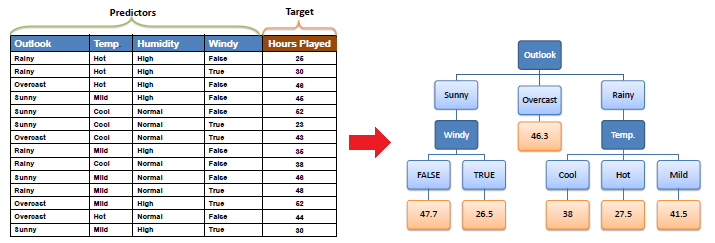

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

tic=timeit.default_timer()
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
toc=timeit.default_timer()
print("Random Forest Algorithm Time",toc - tic)

y_pred = pd.Series(y_pred)
df_y_pred = pd.DataFrame(y_pred)
df_y_test = pd.DataFrame(y_test)
df_y_test = df_y_test.reset_index()
df_y_test = df_y_test.drop(['index'], axis=1)

df_error = df_y_test.join(df_y_pred)
df_error = df_error.rename({"Calificacion": "y_test", 0: "y_pred"}, axis='columns')

for i in df_error.index:
    df_error.at[i, '% Error']  = abs(((df_error.iat[i,0] - df_error.iat[i,1])) / df_error.iat[i,0])*100

df_error["Rank_y_test"] = df_error['y_test'].rank(method='dense', ascending = False)
df_error["Rank_y_pred"] = df_error['y_pred'].rank(method='dense', ascending = False)
print(df_error)

Random Forest Algorithm Time 0.30802585600031307
    y_test    y_pred     % Error  Rank_y_test  Rank_y_pred
0   0.2625  0.192625   26.619048          2.0          1.0
1   0.2750  0.192625   29.954545          1.0          1.0
2   0.0250  0.059250  137.000000          5.0          5.0
3   0.0125  0.027500  120.000000          6.0          6.0
4   0.0750  0.094625   26.166667          4.0          4.0
5   0.2000  0.187750    6.125000          3.0          2.0
6   0.0250  0.027500   10.000000          5.0          6.0
7   0.0250  0.027500   10.000000          5.0          6.0
8   0.0250  0.027500   10.000000          5.0          6.0
9   0.0250  0.027500   10.000000          5.0          6.0
10  0.0250  0.027500   10.000000          5.0          6.0
11  0.2000  0.173625   13.187500          3.0          3.0


### Metrics

In [139]:
arr_y_test = df_error[["y_test"]].to_numpy()
arr_y_pred = df_error[["y_pred"]].to_numpy()

#Variance Score
variance_score = explained_variance_score(arr_y_test, arr_y_pred)
print("Variance Score:",variance_score)

#Mean Absolute Error
MAE = mean_absolute_error(arr_y_test, arr_y_pred)
print("Mean Absolute Error:",MAE)

#Root Mean Squared Error
RSME = mean_squared_error(arr_y_test, arr_y_pred, squared=False)
print("Root Mean Squared Error",RSME)

#R2
R2= r2_score(arr_y_test, arr_y_pred)
print("R2",R2)

Variance Score: 0.8880003501094091
Mean Absolute Error: 0.022687499999999982
Root Mean Squared Error 0.03455468190660519
R2 0.8796045514223193


## Multiple Linear Regression

In [140]:
from sklearn import linear_model

In [141]:
X2 = Evaluacion_Hospitals_2Train[['TOTAL DE CONSULTORIOS','TOTAL MEDICOS GENERALES Y ESPECIALISTAS']]
y2 = Evaluacion_Hospitals_2Train['Calificacion']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.50, random_state=417)

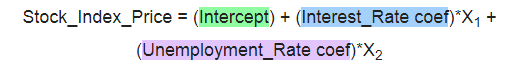

In [142]:
# Esto es lo que estamos haciendo
# Calificacion = (Intercept) + (TOTAL DE CONSULTORIOS coef)*X1 + (TOTAL MEDICOS GENERALES Y ESPECIALISTAS coef)*X2

tic=timeit.default_timer()
regr2 = linear_model.LinearRegression()
reg2 = regr2.fit(X2_train, y2_train)
y2_pred = reg2.predict(X2_test)
toc=timeit.default_timer()
print("Multiple Linear Regression Time",toc-tic)

score = reg2.score(X, y)
print(score)

Multiple Linear Regression Time 0.10862697599986859
0.9823458072109961


In [143]:
y2_pred = pd.Series(y2_pred)
df_y2_pred = pd.DataFrame(y2_pred)
df_y2_test = pd.DataFrame(y2_test)
df_y2_test = df_y2_test.reset_index()
df_y2_test = df_y2_test.drop(['index'], axis=1)

df_error2 = df_y2_test.join(df_y2_pred)
df_error2 = df_error2.rename({"Calificacion": "y2_test", 0: "y2_pred"}, axis='columns')
for i in df_error2.index:
    df_error2.at[i, '% Error']  = abs(((df_error2.iat[i,0] - df_error2.iat[i,1])) / df_error2.iat[i,0])*100

df_error2["Rank_y_test"] = df_error2['y2_test'].rank(method='dense', ascending = False)
df_error2["Rank_y_pred"] = df_error2['y2_pred'].rank(method='dense', ascending = False)
print(df_error2)

    y2_test   y2_pred     % Error  Rank_y_test  Rank_y_pred
0    0.2625  0.258086    1.681352          2.0          2.0
1    0.2750  0.278339    1.214298          1.0          1.0
2    0.0250  0.052153  108.612485          5.0          6.0
3    0.0125  0.017079   36.633386          6.0          8.0
4    0.0750  0.092290   23.053715          4.0          5.0
5    0.2000  0.233692   16.845899          3.0          3.0
6    0.0250  0.022142   11.430438          5.0          7.0
7    0.0250  0.022142   11.430438          5.0          7.0
8    0.0250  0.022142   11.430438          5.0          7.0
9    0.0250  0.022142   11.430438          5.0          7.0
10   0.0250  0.022142   11.430438          5.0          7.0
11   0.2000  0.192817    3.591257          3.0          4.0


### Metrics

In [144]:
arr_y2_test = df_error2[["y2_test"]].to_numpy()
arr_y2_pred = df_error2[["y2_pred"]].to_numpy()

#Variance Score
variance_score2 = explained_variance_score(arr_y2_test, arr_y2_pred)
print("Variance Score:",variance_score2)

#Mean Absolute Error
MAE2 = mean_absolute_error(arr_y2_test, arr_y2_pred)
print("Mean Absolute Error:",MAE2)

#Root Mean Squared Error
RSME2 = mean_squared_error(arr_y2_test, arr_y2_pred, squared=False)
print("Root Mean Squared Error",RSME2)

#R2
R2_2= r2_score(arr_y2_test, arr_y2_pred)
print("R2",R2_2)

Variance Score: 0.9830796120698213
Mean Absolute Error: 0.009328150757363695
Root Mean Squared Error 0.013890646487768138
R2 0.9805445541404758


## Bayesian Ridge Regression

In [145]:
#https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression
from sklearn import linear_model

In [146]:
X3 = Evaluacion_Hospitals_2Train[['TOTAL DE CONSULTORIOS','TOTAL MEDICOS GENERALES Y ESPECIALISTAS']]
y3 = Evaluacion_Hospitals_2Train['Calificacion']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.50, random_state=417)

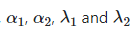

In [147]:
tic=timeit.default_timer()
regr3 = linear_model.BayesianRidge()
reg3 = regr3.fit(X3_train, y3_train)
y3_pred = reg3.predict(X3_test)
toc=timeit.default_timer()
print("Bayesian Ridge Regression",toc-tic)
regr3.coef_

Bayesian Ridge Regression 0.017999914000029094


array([0.00517398, 0.01984417])

In [148]:
y3_pred = pd.Series(y3_pred)
df_y3_pred = pd.DataFrame(y3_pred)
df_y3_test = pd.DataFrame(y3_test)
df_y3_test = df_y3_test.reset_index()
df_y3_test = df_y3_test.drop(['index'], axis=1)

df_error3 = df_y3_test.join(df_y3_pred)
df_error3 = df_error3.rename({"Calificacion": "y3_test", 0: "y3_pred"}, axis='columns')
for i in df_error3.index:
    df_error3.at[i, '% Error']  = abs(((df_error3.iat[i,0] - df_error3.iat[i,1])) / df_error3.iat[i,0])*100

df_error3["Rank_y_test"] = df_error3['y3_test'].rank(method='dense', ascending = False)
df_error3["Rank_y_pred"] = df_error3['y3_pred'].rank(method='dense', ascending = False)
print(df_error3)

    y3_test   y3_pred     % Error  Rank_y_test  Rank_y_pred
0    0.2625  0.256514    2.280388          2.0          2.0
1    0.2750  0.277210    0.803599          1.0          1.0
2    0.0250  0.052047  108.186248          5.0          6.0
3    0.0125  0.017532   40.257625          6.0          8.0
4    0.0750  0.091735   22.313200          4.0          5.0
5    0.2000  0.234903   17.451413          3.0          3.0
6    0.0250  0.022706    9.175270          5.0          7.0
7    0.0250  0.022706    9.175270          5.0          7.0
8    0.0250  0.022706    9.175270          5.0          7.0
9    0.0250  0.022706    9.175270          5.0          7.0
10   0.0250  0.022706    9.175270          5.0          7.0
11   0.2000  0.191807    4.096253          3.0          4.0


### Metrics

In [149]:
arr_y3_test = df_error3[["y3_test"]].to_numpy()
arr_y3_pred = df_error3[["y3_pred"]].to_numpy()

#Variance Score
variance_score3 = explained_variance_score(arr_y3_test, arr_y3_pred)
print("Variance Score:",variance_score3)

#Mean Absolute Error
MAE3 = mean_absolute_error(arr_y3_test, arr_y3_pred)
print("Mean Absolute Error:",MAE3)

#Root Mean Squared Error
RSME3 = mean_squared_error(arr_y3_test, arr_y3_pred, squared=False)
print("Root Mean Squared Error",RSME3)

#R2
R2_3= r2_score(arr_y3_test, arr_y3_pred)
print("R2",R2_3)

Variance Score: 0.9824683355868198
Mean Absolute Error: 0.009297833496145819
Root Mean Squared Error 0.014110412605079777
R2 0.9799240688878595
